In [224]:
import numpy as np
import pandas as pd

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [14]:
DATA_PATH = 'project_data.csv'
data = pd.read_csv(DATA_PATH, delimiter=';')

In [17]:
def rename_columns(dataset: pd.DataFrame):
        """Rename dataframe columns names.
        Notes:
            target column names based on provided data_description.txt
        Returns:
            pd.DataFrame - dataframe with renamed columns 
        """
    
        target_columns = {
            'X01': 'account_status',
            'X06': 'account_savings',
            'X02': 'credit_duration',
            'X03': 'credit_history',
            'X04': 'credit_purpose',
            'X05': 'credit_amount',
            'X07': 'employment_status',
            'X17': 'employment_description',
            'X08': 'income_installment_rate',
            'X09': 'gender_status',
            'X10': 'credit_guarantors',
            'X11': 'residence',
            'X12': 'owned_property',
            'X13': 'age',
            'X14': 'installment_plans',
            'X15': 'accomondation_type',
            'X16': 'credit_existing_number',
            'X18': 'liable_maintain',
            'X19': 'phone_number',
            'X20': 'foreign_worker',
            'Y': 'y'
        }
        return dataset.rename(columns=target_columns)    

In [18]:
data = rename_columns(data)

In [19]:
data.head()

,account_status,credit_duration,credit_history,credit_purpose,credit_amount,account_savings,employment_status,income_installment_rate,gender_status,credit_guarantors,...,owned_property,age,installment_plans,accomondation_type,credit_existing_number,employment_description,liable_maintain,phone_number,foreign_worker,y
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [21]:
# account_status - nominal
# credit_duration - interval
# credit_history - nominal
# credit_purpose - nominal
# credit_amount - interval
# ................
# OrdinalEncoding <- when Ordinal Label
# OHE <- when Nominal Label

In [31]:
# 1 Devide data into Quantative and Qualitative attributes
qualitative_columns = [column for column in data.columns if data[f'{column}'].dtype == 'object']
quantative_columns = [column for column in data.columns if data[f'{column}'].dtype != 'object']

In [36]:
# 2 Apply OHE because all of columns are NOMINAL type
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
one_hot = pd.DataFrame(encoder.fit_transform(data))

In [37]:
one_hot

,0,1,2,3,4,5,6,7,8,9,...,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
996,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
997,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [47]:
# 3 Merge OHE dataframe and Numerical dataframe
df = pd.concat([data[[*quantative_columns]], one_hot], axis=1)

# 4 Split X and y 
y = df.y
X = df.drop(columns='y', axis=1)

In [ ]:
# 5 Apply normalization (shape: (1000, 1084))
from sklearn.preprocessing import StandardScaler
normilized_df = StandardScaler().fit_transform(X)

In [231]:
pd.DataFrame(normilized_df)

,0,1,2,3,4,5,6,7,8,9,...,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.627770,-0.606621,-0.259299,...,0.766356,-0.416784,0.428290,-0.428290,-1.214598,1.214598,0.196014,-0.196014,0.654654,-0.654654
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,-0.614337,1.648476,-0.259299,...,0.766356,-0.416784,0.428290,-0.428290,0.823318,-0.823318,0.196014,-0.196014,-1.527525,1.527525
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,-0.614337,-0.606621,-0.259299,...,-1.304877,-0.416784,-2.334869,2.334869,0.823318,-0.823318,0.196014,-0.196014,0.654654,-0.654654
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.627770,-0.606621,-0.259299,...,0.766356,-0.416784,-2.334869,2.334869,0.823318,-0.823318,0.196014,-0.196014,0.654654,-0.654654
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.627770,-0.606621,-0.259299,...,0.766356,-0.416784,-2.334869,2.334869,0.823318,-0.823318,0.196014,-0.196014,-1.527525,1.527525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,-0.614337,-0.606621,-0.259299,...,-1.304877,-0.416784,0.428290,-0.428290,0.823318,-0.823318,0.196014,-0.196014,0.654654,-0.654654
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1.627770,-0.606621,-0.259299,...,-1.304877,2.399324,0.428290,-0.428290,-1.214598,1.214598,0.196014,-0.196014,0.654654,-0.654654
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,-0.614337,-0.606621,-0.259299,...,0.766356,-0.416784,0.428290,-0.428290,0.823318,-0.823318,0.196014,-0.196014,0.654654,-0.654654
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1.627770,-0.606621,-0.259299,...,0.766356,-0.416784,0.428290,-0.428290,-1.214598,1.214598,0.196014,-0.196014,-1.527525,1.527525


## k-Means

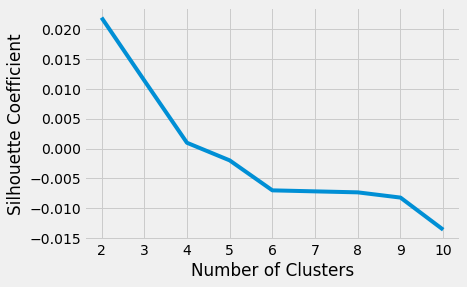

In [234]:
# 6 Invoke k-Means

# Silhoette coefficient
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    score = silhouette_score(normilized_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [185]:
# apply k-Means with best k - clusters number, based on Silhoette coeff 

'''
Steps:
- define params of model
- fit

Params Description: 
- max_iter: number of changes of centers of clusters (after procedure will be finished) IF not converge → it will be said → increase number
- n_clusters - number of clusters
- n_init - how many times the clusterization happens (save the best clusterization)
-  tol (tolerance) - the threshold for changes of cluster centers (how the cluster centers changed)

Explonation -- https://datasciencelab.wordpress.com/tag/lloyds-algorithm/
The k-means problem is solved using either Lloyd’s or Elkan’s algorithm.

If the algorithm stops before fully converging (because of tol or max_iter), labels_ and cluster_centers_ will not
be consistent, i.e. the cluster_centers_ will not be the means of the points in each cluster. Also, the estimator 
will reassign labels_ after the last iteration to make labels_ consistent with predict on the training set.
'''

kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10, # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
    "max_iter": 500, # Maximum number of iterations of the k-means algorithm for a single run.
    "random_state": 42,
}

k_means = KMeans(n_clusters=4, **kmeans_kwargs)
k_means.fit(normilized_df)

labels = k_means.labels_
cluster_centers = k_means.cluster_centers_
# print(labels)


# Map obtained clusters to original data
data['cluster'] = labels

In [186]:
print(data.groupby('cluster').size())
data.groupby('cluster').mean()

cluster
0      1
1    665
2    192
3    142
dtype: int64


,credit_duration,credit_amount,income_installment_rate,residence,age,credit_existing_number,liable_maintain,y,hierarcical_cluster
cluster,,,,,,,,,
0,5.000000,3448.000000,1.000000,4.000000,74.000000,1.000000,1.000000,1.000000,3.000000
1,20.542857,2808.060150,3.300752,2.720301,34.899248,1.439098,1.082707,1.314286,1.687218
2,16.531250,3348.453125,1.781250,2.770833,31.755208,1.208333,1.140625,1.223958,1.411458
3,28.612676,5334.838028,3.063380,3.521127,43.429577,1.528169,1.514085,1.338028,2.408451


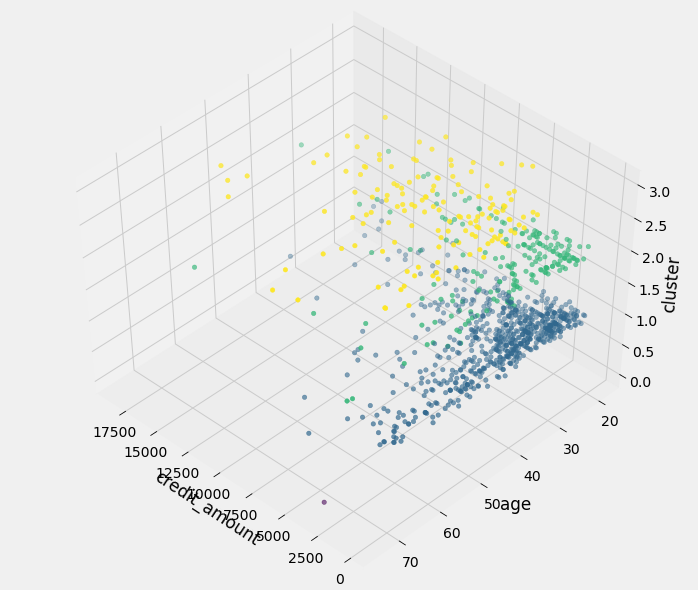

In [187]:
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('cluster')

ax.scatter(data.credit_amount, data.age, data.cluster, c=labels.astype(np.float));

## Hierarcical Clustering

In [208]:
# 1 Find distances 
link = linkage(normilized_df, 'ward', 'euclidean')
# 4 columns [., ., ., number of observations in cluster]

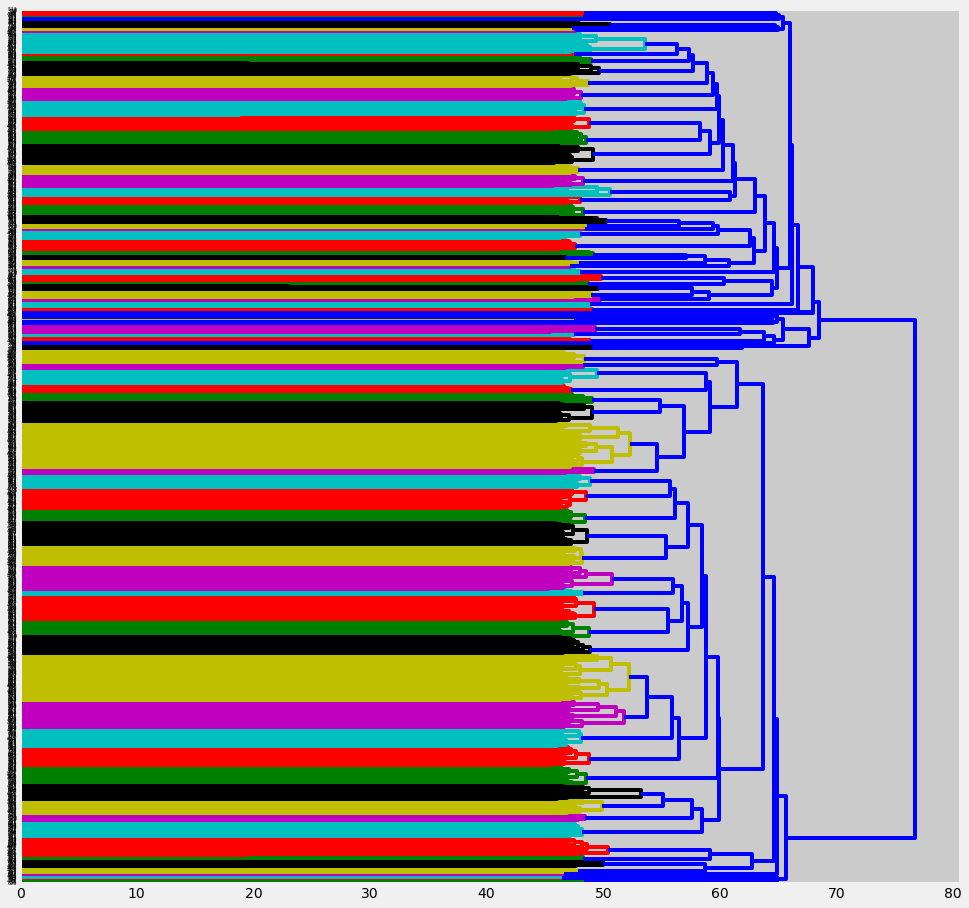

In [209]:
plt.figure(figsize=(15, 15))
dn = dendrogram(link, orientation='right')

In [212]:
dist

[array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [222]:
# # 2 find clusters number

# K = range(1, 5)
# models = [fcluster(link, k, criterion='maxclust') for k in K]
# clusters = [model for model in models]

# plt.figure(figsize=(10, 8))
# plt.plot(K, clusters, marker='o')
# plt.xlabel('k')
# plt.ylabel('Sum of distances')
# plt.xlabel("Number of Clusters")
# plt.title("The Elbow method showing the optimal K")
# plt.legend(K, loc='upper left')
# plt.show()    

In [178]:
data['hierarcical_cluster'] = fcluster(link, 3, criterion='maxclust')

In [184]:
print(data.groupby('hierarcical_cluster').size())
data.groupby('hierarcical_cluster').mean()

hierarcical_cluster
1    611
2     40
3    349
dtype: int64


,credit_duration,credit_amount,income_installment_rate,residence,age,credit_existing_number,liable_maintain,y,cluster
hierarcical_cluster,,,,,,,,,
1,19.787234,2991.981997,2.929624,2.638298,30.022913,1.302782,1.106383,1.302782,1.361702
2,42.900000,6965.450000,2.925000,3.250000,39.800000,1.450000,1.075000,1.350000,1.775000
3,20.335244,3336.787966,3.054441,3.160458,44.727794,1.584527,1.249284,1.289398,1.638968


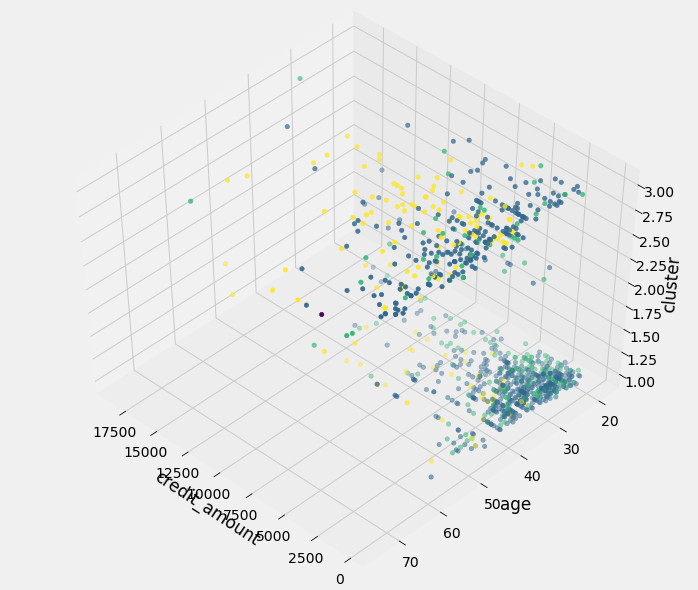

In [180]:
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('cluster')

ax.scatter(data.credit_amount, data.age, data.hierarcical_cluster, c=labels.astype(np.float));

In [227]:
data

,account_status,credit_duration,credit_history,credit_purpose,credit_amount,account_savings,employment_status,income_installment_rate,gender_status,credit_guarantors,...,accomondation_type,credit_existing_number,employment_description,liable_maintain,phone_number,foreign_worker,y,cluster,hierarcical_cluster,dbscan_cluster
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A152,2,A173,1,A192,A201,1,1,3,-1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A152,1,A173,1,A191,A201,2,1,1,-1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A152,1,A172,2,A191,A201,1,1,3,-1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A153,1,A173,2,A191,A201,1,3,1,-1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A153,2,A173,2,A191,A201,2,3,3,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A152,1,A172,1,A191,A201,1,1,1,-1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A152,1,A174,1,A192,A201,1,1,1,-1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A152,1,A173,1,A191,A201,1,1,3,-1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A153,1,A173,1,A192,A201,2,1,1,-1


## DBSCAN

In [228]:
clustering = DBSCAN(eps=3, min_samples=10).fit(normilized_df)
data['dbscan_cluster'] = clustering.labels_

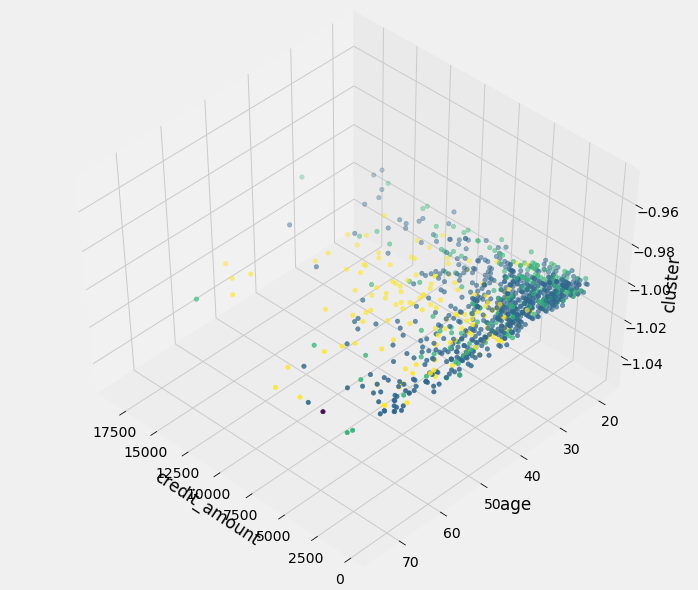

In [229]:
fig = plt.figure(1, figsize=(10, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.set_xlabel('credit_amount')
ax.set_ylabel('age')
ax.set_zlabel('cluster')

ax.scatter(data.credit_amount, data.age, data.dbscan_cluster, c=labels.astype(np.float));